# Polynomial functions

    Compare different polynomial regression models in order to assess which model fits best.

In [1]:
import graphlab

In [2]:
# write a polynomial function that takes an SArray and a maximal degree 
# and returns an SFrame with columns containing the SArray to all the powers up to the maximal degree
tmp = graphlab.SArray([1., 2., 3.])
tmp_cubed = tmp.apply(lambda x: x**3)
print tmp
print tmp_cubed

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1477692872.log
INFO:graphlab.cython.cy_server:GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1477692872.log


This non-commercial license of GraphLab Create for academic use is assigned to annaliakruseman@gmail.com and will expire on August 25, 2017.
[1.0, 2.0, 3.0]
[1.0, 8.0, 27.0]


In [3]:
# create an empty SFrame and name the first column to the first power
ex_sframe = graphlab.SFrame()
ex_sframe['power_1'] = tmp
print ex_sframe

+---------+
| power_1 |
+---------+
|   1.0   |
|   2.0   |
|   3.0   |
+---------+
[3 rows x 1 columns]



In [4]:
# define a function that continues to add columns to the xth power

def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_sframe = graphlab.SFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_sframe[name] = feature.apply(lambda x: x**power)
    return poly_sframe

In [5]:
# test this array to the 3rd power
print polynomial_sframe(tmp, 3)

+---------+---------+---------+
| power_1 | power_2 | power_3 |
+---------+---------+---------+
|   1.0   |   1.0   |   1.0   |
|   2.0   |   4.0   |   8.0   |
|   3.0   |   9.0   |   27.0  |
+---------+---------+---------+
[3 rows x 3 columns]



# Visualize the polynomial regression

In [21]:
import pandas as pd
# ruralpop = pd.read_csv('/Users/annalie/Dev/data-science-from-scratch/data/ruralpop.csv', sep = ';')
# ruralpop.head()
ruralpop_costa_rica = graphlab.SFrame.read_csv('/Users/annalie/Dev/data-science-from-scratch/data/ruralpop.csv', delimiter = ';')
ruralpop_costa_rica

Finished parsing file /Users/annalie/Dev/data-science-from-scratch/data/ruralpop.csv

Parsing completed. Parsed 57 lines in 0.011184 secs.

Finished parsing file /Users/annalie/Dev/data-science-from-scratch/data/ruralpop.csv

Parsing completed. Parsed 57 lines in 0.011603 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


year,population
1960,876422
1961,907521
1962,939717
1963,970782
1964,996045
1965,1020682
1966,1044596
1967,1067787
1968,1090029
1969,1111143


In [59]:
sales = graphlab.SFrame('/Users/annalie/Dev/regression/kc_house_data.csv')
sales = sales.sort(['sqft_living', 'price'])

ruralpop_costa_rica = graphlab.SFrame.read_csv('/Users/annalie/Dev/data-science-from-scratch/data/ruralpop.csv', delimiter = ';')
worldbank = graphlab.SFrame.read_csv('https://d37djvu3ytnwxt.cloudfront.net/assets/courseware/v1/1e732b84dd39b51e4ad5b3f7ab84a964/asset-v1:MITx+14.740x+3T2016+type@asset+block/wb_dev_ind.csv')

Finished parsing file /Users/annalie/Dev/regression/kc_house_data.csv

Parsing completed. Parsed 100 lines in 0.130427 secs.

Finished parsing file /Users/annalie/Dev/regression/kc_house_data.csv

Parsing completed. Parsed 21613 lines in 0.111314 secs.

Finished parsing file /Users/annalie/Dev/data-science-from-scratch/data/ruralpop.csv

Parsing completed. Parsed 56 lines in 0.028296 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,float,int,float,int,int,float,int,int,int,int,int,int,int,int,int,float,float,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
------------------------------------------------------

Finished parsing file /Users/annalie/Dev/data-science-from-scratch/data/ruralpop.csv

Parsing completed. Parsed 56 lines in 0.012301 secs.

Finished parsing file https://d37djvu3ytnwxt.cloudfront.net/assets/courseware/v1/1e732b84dd39b51e4ad5b3f7ab84a964/asset-v1:MITx+14.740x+3T2016+type@asset+block/wb_dev_ind.csv

Parsing completed. Parsed 100 lines in 0.016081 secs.


Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
------------------------------------------------------

Finished parsing file https://d37djvu3ytnwxt.cloudfront.net/assets/courseware/v1/1e732b84dd39b51e4ad5b3f7ab84a964/asset-v1:MITx+14.740x+3T2016+type@asset+block/wb_dev_ind.csv

Parsing completed. Parsed 214 lines in 0.013009 secs.


Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


In [61]:
worldbank = worldbank.dropna()

In [45]:
# worldbank['literacy_all'] = worldbank['literacy_all'].fillna(worldbank['literacy_all'].mean())
# worldbank['literacy_female'] = worldbank['literacy_female'].fillna(worldbank['literacy_female'].mean())
# worldbank['literacy_male'] = worldbank['literacy_male'].fillna(worldbank['literacy_male'].mean())
# worldbank['gdp_per_capita'] = worldbank['gdp_per_capita'].fillna(worldbank['gdp_per_capita'].mean())
# worldbank['infant_mortality'] = worldbank['infant_mortality'].fillna(worldbank['infant_mortality'].mean())

In [55]:
# # remove nan values for infant mortality
# infant_mortality = []
# for value in infant_mortality:
#     if not math.isnan(value):
#         infant_mortality.append(value)

# # remove nan values for gdp_per_capita
# gdp_per_capita = []
# for value in gdp_per_capita:
#     if not math.isnan(value):
#         gdp_per_capita.append(value)

# # remove nan values for infant mortality
# literacy_all = []
# for value in literacy_all:
#     if not math.isnan(value):
#         literacy_all.append(value)

In [62]:
# poly1_data = polynomial_sframe(sales['sqft_living'], 1)
# poly1_data['price'] = sales['price']

# poly1_ruralpop = polynomial_sframe(ruralpop['year'], 1)
# poly1_ruralpop['population'] = ruralpop['population']

poly1_worldbank = polynomial_sframe(worldbank['literacy_all'], 1)
poly1_worldbank['gdp_per_capita'] = worldbank['gdp_per_capita']

In [63]:
# build the regression model
# model1 = graphlab.linear_regression.create(poly1_data, 
#                                            target = 'price', 
#                                            features = ['power_1'], 
#                                            validation_set = None)

# model1_ruralpop = graphlab.linear_regression.create(poly1_ruralpop, 
#                                                     target = 'population', 
#                                                     features = ['power_1'], 
#                                                     validation_set = None)

model1_worldbank = graphlab.linear_regression.create(poly1_worldbank,
                                                     target = 'gdp_per_capita', 
                                                     features = ['power_1'], 
                                                     validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.018511     | 4362074.683616     | 261440.790302 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 147

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.000570     | 51628.519774       | 7473.531821   |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [64]:
#let's take a look at the weights before we plot
model1_worldbank.get("coefficients")

name,index,value,stderr
(intercept),None,-7967.91571733,2550.85953271
power_1,None,167.908664536,30.3625466296


In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

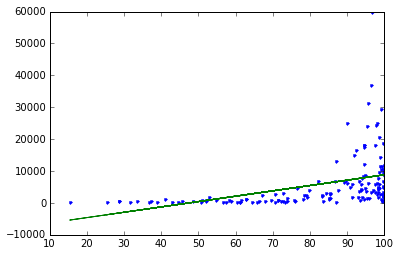

In [66]:
plt.plot(poly1_worldbank['power_1'], poly1_worldbank['gdp_per_capita'],'.',
         poly1_worldbank['power_1'], model1_worldbank.predict(poly1_worldbank),'-')

In [68]:
# build a regression model for the second polynomal
# poly2_data = polynomial_sframe(sales['sqft_living'], 2)
# square_features = poly2_data.column_names() # get the name of the features
# poly2_data['price'] = sales['price'] # add price to the data since it's the target
# model2 = graphlab.linear_regression.create(poly2_data, target = 'price', features = square_features, validation_set = None)

# build a regression model for the second polynomal
poly2_worldbank = polynomial_sframe(worldbank['literacy_all'], 2)
# get the name of the features
literacy_features = poly2_worldbank.column_names() 
# add price to the data since it's the target
poly2_worldbank['gdp_per_capita'] = worldbank['gdp_per_capita'] 
model2_worldbank = graphlab.linear_regression.create(poly2_worldbank,
                                                     target = 'gdp_per_capita',
                                                     features = literacy_features,
                                                     validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 2

Number of unpacked features : 2

Number of coefficients    : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.028344     | 5913021.143248     | 250948.367620 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 147

Number of features          : 2

Number of unpacked features : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.000513     | 51045.188678       | 7329.871593   |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [69]:
model2_worldbank.get("coefficients")

name,index,value,stderr
(intercept),None,5702.20448652,6537.82817208
power_1,None,-278.665798861,199.083119903
power_2,None,3.21902265994,1.41715518128


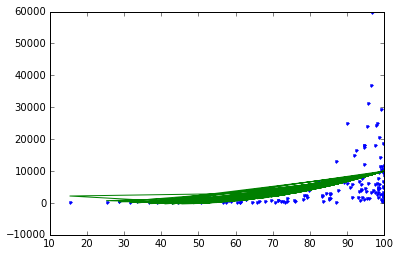

In [70]:
plt.plot(poly2_worldbank['power_1'], poly2_worldbank['gdp_per_capita'],'.',
         poly2_worldbank['power_1'], model2_worldbank.predict(poly2_worldbank),'-')

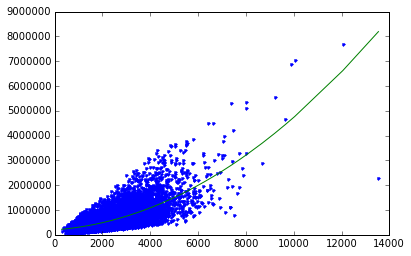

In [71]:
plt.plot(poly2_data['power_1'],poly2_data['price'],'.',
        poly2_data['power_1'], model2.predict(poly2_data),'-')

In [75]:
poly15_worldbank = polynomial_sframe(worldbank['literacy_all'], 15)
fifteen_features = poly15_worldbank.column_names() # get the name of the features
poly15_worldbank['gdp_per_capita'] = worldbank['gdp_per_capita'] # add price to the data since it's the target
model15_worldbank = graphlab.linear_regression.create(poly15_worldbank,
                                                      target = 'gdp_per_capita',
                                                      features = fifteen_features,
                                                      validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 147

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.001885     | 49284.364688       | 7103.951237   |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [76]:
model15_worldbank.get("coefficients").print_rows(num_rows=16)

+-------------+-------+--------------------+-------------------+
|     name    | index |       value        |       stderr      |
+-------------+-------+--------------------+-------------------+
| (intercept) |  None |    -1485.604183    |   6467925.71818   |
|   power_1   |  None |   40.9422178812    |   1362382.91124   |
|   power_2   |  None |   0.97115913644    |   118048.760093   |
|   power_3   |  None | -0.00173447308288  |   5529.25395812   |
|   power_4   |  None | -0.000149267449957 |   154.465702258   |
|   power_5   |  None | -1.98656940562e-06 |   2.68707189036   |
|   power_6   |  None | -1.46661593336e-08 |  0.0273422089617  |
|   power_7   |  None | -1.98033214187e-11 |        nan        |
|   power_8   |  None | 1.38578827072e-12  | 4.29921662617e-06 |
|   power_9   |  None | 2.83804602705e-14  | 4.33527239244e-08 |
|   power_10  |  None | 3.76749140837e-16  |        nan        |
|   power_11  |  None | 3.86147064563e-18  | 6.23844627097e-12 |
|   power_12  |  None |  

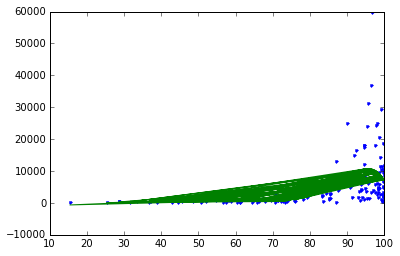

In [80]:
plt.plot(poly15_worldbank['power_1'], poly15_worldbank['gdp_per_capita'],'.',
        poly15_worldbank['power_1'], model15_worldbank.predict(poly15_worldbank))

# Selecting a polynomial degree

In [82]:
training_and_validation,testing = worldbank.random_split(.9,seed=1)
training, validation = training_and_validation.random_split(.5,seed=1)

In [85]:
for degree in range(7, 25): 
    train_data = polynomial_sframe(training['literacy_all'], degree)
    # get the name of the features
    train_features = train_data.column_names() 
    # add price to the data since it's the target
    train_data['gdp_per_capita'] = training['gdp_per_capita'] 
    model = graphlab.linear_regression.create(train_data,
                                              target = 'gdp_per_capita',
                                              features = train_features,
                                              validation_set = None,
                                              verbose=False)

    validation_data = polynomial_sframe(validation['literacy_all'], degree)
    # add price to the data since it's the target
    validation_data['gdp_per_capita'] = validation['gdp_per_capita'] 
    
    # First get the predictions
    predictions = model.predict(validation_data)
    # then compute the residuals (since we are squaring it doesn't matter which order you subtract)
    residuals = validation_data['gdp_per_capita'] - predictions
    # square the residuals and add them up
    residuals_squared = residuals * residuals
    RSS = residuals_squared.sum()
    print("Degree: %s, RSS: $%.6f" % (degree, RSS))

Degree: 7, RSS: $2003897502.123492
Degree: 8, RSS: $1986609582.022968
Degree: 9, RSS: $1968200490.064905
Degree: 10, RSS: $1951261813.610318
Degree: 11, RSS: $1937561588.504926
Degree: 12, RSS: $1927699227.008308
Degree: 13, RSS: $1921556201.138149
Degree: 14, RSS: $1918773082.312564
Degree: 15, RSS: $1918988142.327445
Degree: 16, RSS: $1921891252.940668
Degree: 17, RSS: $1927197717.299612
Degree: 18, RSS: $1934609174.703033
Degree: 19, RSS: $1943791505.121192
Degree: 20, RSS: $1954376719.337541
Degree: 21, RSS: $1965983251.525948
Degree: 22, RSS: $1978243889.391457
Degree: 23, RSS: $1990831069.352470
Degree: 24, RSS: $2003473168.643125


    The function with a polynomial degree of 14 shows the best results